In [26]:
# 1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы:
# колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date),
# соответствует названию папки, где лежит папка с пользователем)

# 2. Выясните, какой пользователь купил больше всего товаров.
# Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
# Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот.

# 3. Сколько было продано единиц товара с product_id==56?

# 4. Визуализируйте продажи по дням.

# 5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)


%matplotlib inline

In [9]:
# Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity),
# имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

total_data = pd.DataFrame()
for i in os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/shared/homeworks/python_ds_miniprojects/4/data/'):
    for j in os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/shared/homeworks/python_ds_miniprojects/4/data/' + '/' + i):
        for k in os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/shared/homeworks/python_ds_miniprojects/4/data/' + '/' + i + '/' + j):
            all_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/shared/homeworks/python_ds_miniprojects/4/data/' + '/' + i + '/' + j + '/' + k)
            a = i.split('/')[-1]
            all_data['date'] = a
            b = j.split('/')[-1]
            all_data['name'] = b
            total_data = pd.concat([total_data, all_data])
    
total_data

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...,...
0,0,18,4,2020-12-07,Petr_Fedorov
1,1,94,4,2020-12-07,Petr_Fedorov
0,0,95,2,2020-12-07,Vasiliy_Ivanov
1,1,83,3,2020-12-07,Vasiliy_Ivanov


In [2]:
os.getcwd()

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-ale-frolov/Lesson 4'

In [15]:
df = total_data.rename(columns = {'Unnamed: 0': 'wtf'}).drop('wtf', axis=1)
df.head()

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


In [20]:
df.quantity.sum()

480

In [28]:
# Выясните, какой пользователь купил больше всего товаров.
# Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

df.groupby(['name'], as_index = False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity') \
    .tail(5)

,name,quantity
16,Rostislav_Petrov,28
10,Petr_Fedorov,34
6,Anton_Smirnov,45
3,Alexey_Smirnov,52
13,Petr_Smirnov,52


In [29]:
# Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

# по оси x – идентификаторы товаров (product_id) 
# по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
# Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

# В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

top_product = total_data \
    .groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'})
top_product.sort_values(by='quantity', ascending=False)

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
...,...,...
52,75,2
39,52,1
56,80,1
43,57,1


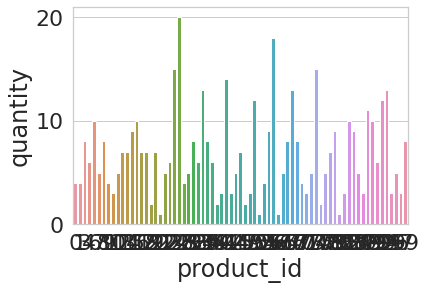

In [30]:
ax = sns.barplot(x='product_id', y='quantity', data=top_product)

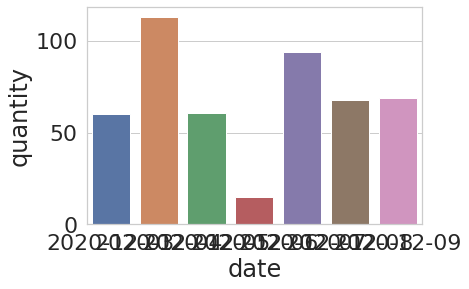

In [31]:
# Посмотрим на продажи по дням!
# Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

day_sales = total_data \
    .groupby('date', as_index=False) \
    .agg({'quantity': 'sum'})

sns.barplot(x='date', y='quantity', data=day_sales)

In [33]:
day_sales

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


In [36]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

# Например, пользователь Sasha Tsarev дважды приобрел товар 6.
# Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет.
# Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

ddr = total_data \
    .drop_duplicates(subset=['product_id', 'date', 'name']) \
    .groupby(['name','product_id'], as_index = False) \
    .agg({'date': 'count'}) \
    .sort_values(by='date', ascending=False)

ddr

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
0,Alexey_Fedorov,13,1
109,Petr_Smirnov,21,1
103,Petr_Petrov,64,1
...,...,...,...
54,Anton_Smirnov,28,1
55,Anton_Smirnov,33,1
56,Anton_Smirnov,34,1
57,Anton_Smirnov,40,1
